<a href="https://colab.research.google.com/github/KV-23/FINANCE_PROJECTS/blob/main/MACD_Indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('fivethirtyeight')
import time
from datetime import datetime

In [20]:
end_date=datetime.today().strftime('%Y-%m-%d')
df=yf.download('AAPL',start='2021-01-01',end=end_date)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,126.683434,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.249710,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,123.932655,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.161621,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.267838,105158200
...,...,...,...,...,...,...
2024-08-09,212.100006,216.779999,211.970001,216.240005,215.990005,42201600
2024-08-12,216.070007,219.509995,215.600006,217.529999,217.529999,38028100
2024-08-13,219.009995,221.889999,219.009995,221.270004,221.270004,44155300


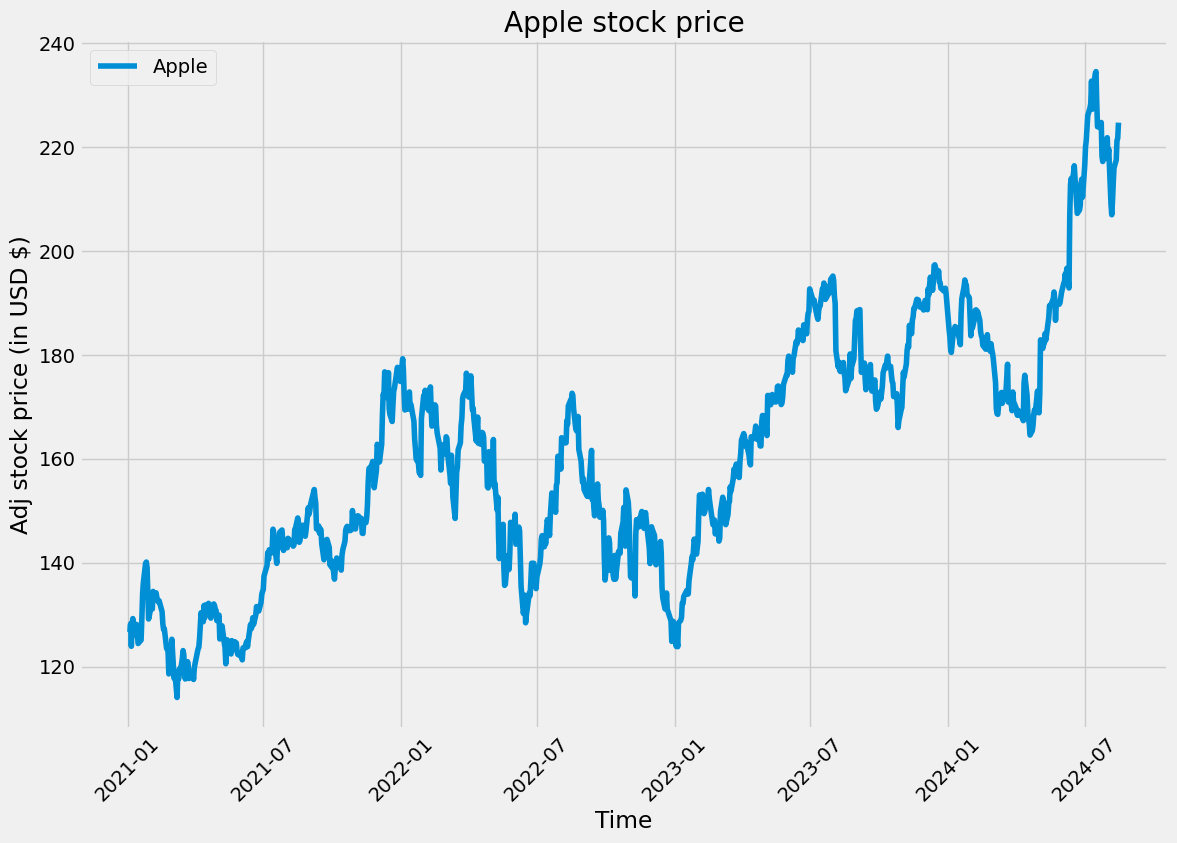

In [21]:
plt.figure(figsize=(12.5,8.5))
plt.title('Apple stock price')
plt.plot(df['Adj Close'],label='Apple')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Adj stock price (in USD $)')
plt.show()

In [22]:
#Calculating the MACD
ShortEMA=df.Close.ewm(span=12,adjust=False).mean()
LongEMA=df.Close.ewm(span=26,adjust=False).mean()
MACD=ShortEMA-LongEMA
signal=MACD.ewm(span=9, adjust=False).mean()

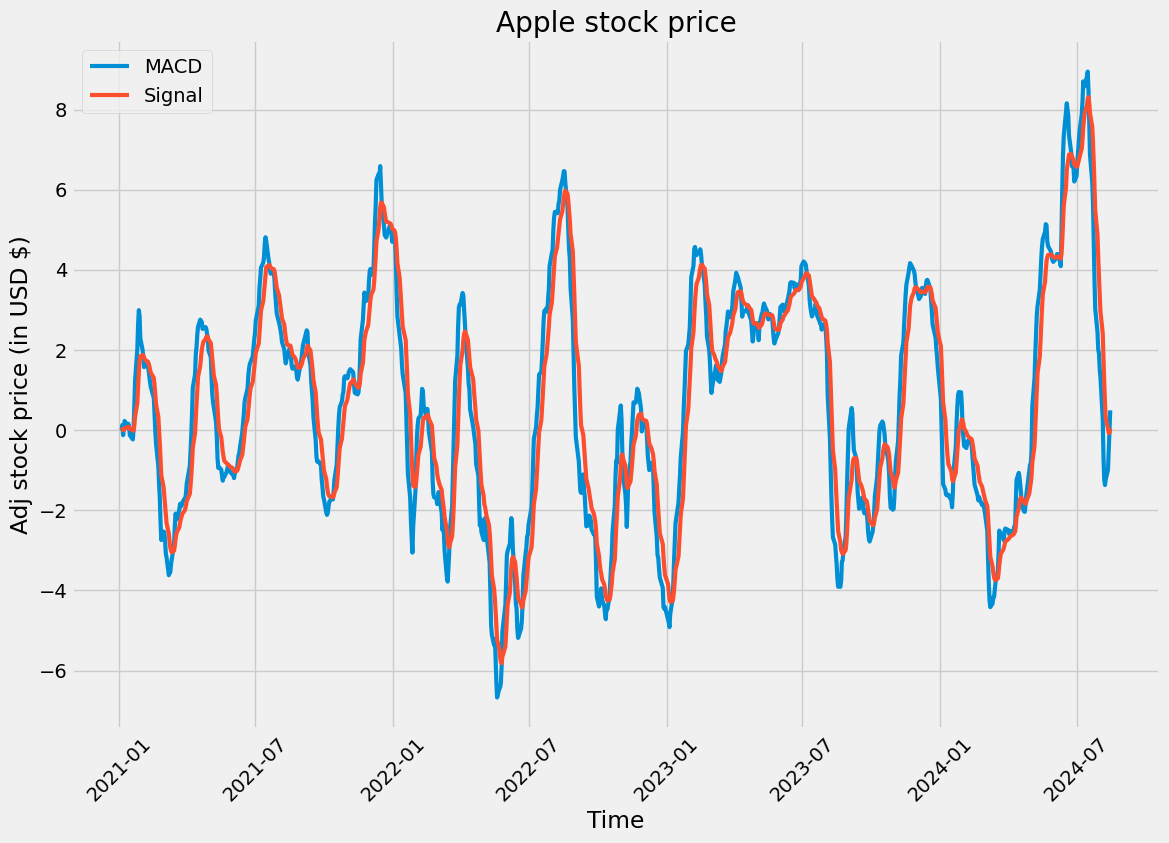

In [24]:
plt.figure(figsize=(12.5,8.5))
plt.title('Apple stock price')
plt.plot(MACD,label='MACD',linewidth=3)
plt.plot(signal,label='Signal',linewidth=3)
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Adj stock price (in USD $)')
plt.show()

In [25]:
df['MACD']=MACD
df['Signal']=signal
df

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal
Date,,,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,126.683434,143301900,0.000000,0.000000
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.249710,97664900,0.127635,0.025527
2021-01-06,127.720001,131.050003,126.379997,126.599998,123.932655,155088000,-0.125616,-0.004702
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.161621,109578200,0.022015,0.000642
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.267838,105158200,0.227573,0.046028
...,...,...,...,...,...,...,...,...
2024-08-09,212.100006,216.779999,211.970001,216.240005,215.990005,42201600,-1.225504,0.295497
2024-08-12,216.070007,219.509995,215.600006,217.529999,217.529999,38028100,-0.995462,0.037305
2024-08-13,219.009995,221.889999,219.009995,221.270004,221.270004,44155300,-0.505538,-0.071263


In [30]:
def buy_sell(signal):
  Buy=[]
  Sell=[]
  flag=-1

  for i in range(0,len(signal)):
    if signal['MACD'][i]>signal['Signal'][i]:
      Sell.append(np.nan)
      if flag!=1:
        Buy.append(signal['Adj Close'][i])
        flag=1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i]<signal['Signal'][i]:
      Buy.append(np.nan)
      if flag!=0:
        Sell.append(signal['Adj Close'][i])
        flag=0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
  return(Buy,Sell)

In [31]:
a=buy_sell(df)
df['Buy Signal Price']=a[0]
df['Sell Signal Price']=a[1]

<ipython-input-30-38535ef7641a>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if signal['MACD'][i]>signal['Signal'][i]:
<ipython-input-30-38535ef7641a>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif signal['MACD'][i]<signal['Signal'][i]:
<ipython-input-30-38535ef7641a>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Buy.append(signal['Adj Close'][i])
<ipython-input-30-38535ef7641a>:17: FutureWarning: Series.__getitem__ 

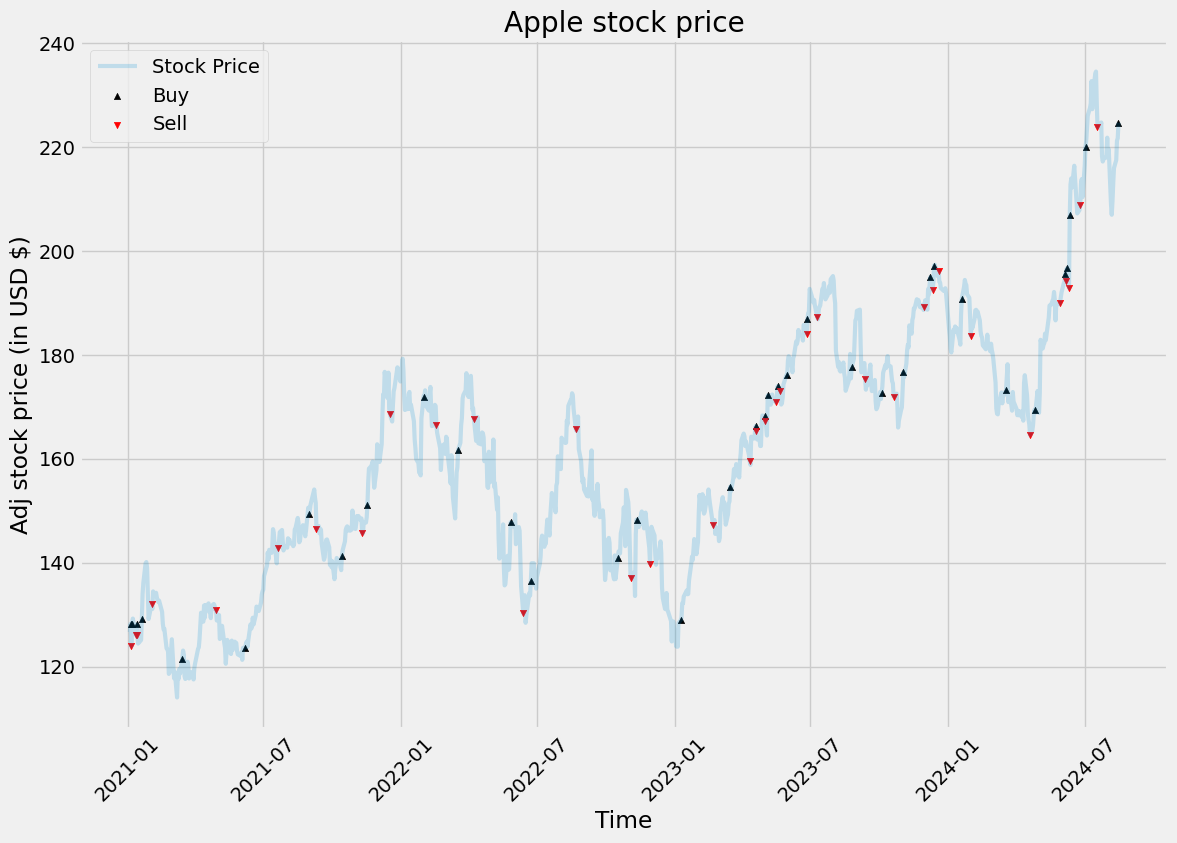

In [39]:
plt.figure(figsize=(12.5,8.5))
plt.title('Apple stock price')
plt.plot(df['Adj Close'],label='Stock Price',linewidth=3,alpha=0.2)
plt.scatter(df.index,df['Buy Signal Price'],label='Buy',marker='^',color='Black',s=20,alpha=1)
plt.scatter(df.index,df['Sell Signal Price'],label='Sell',marker='v',color='Red',s=20,alpha=1)
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Adj stock price (in USD $)')
plt.show()